In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

import matplotlib
%matplotlib inline

# Correlation

Tokenization took: 10.30 ms
Type conversion took: 10.86 ms
Parser memory cleanup took: 0.00 ms


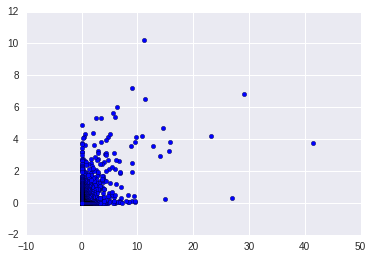

In [15]:
data = pd.read_csv("../data/vgsales.csv", warn_bad_lines = True, error_bad_lines = False, verbose = True)
data.drop(data.columns[[0, 11]], axis = 1, inplace = True)
data["Year"] = data["Year"].astype('category')

plt.scatter(data['NA_Sales'], data['JP_Sales'])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fe3691e7050>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7fe3686c5590>]], dtype=object)

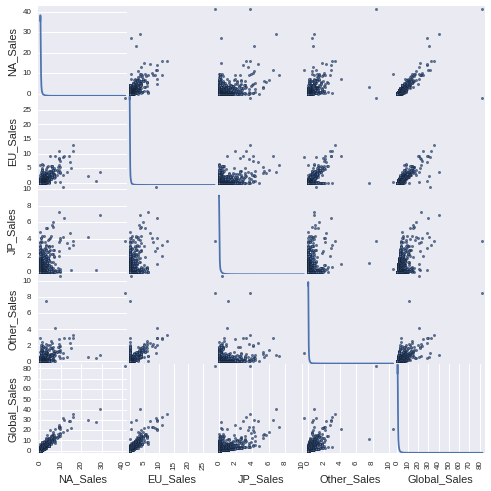

In [16]:
pd.scatter_matrix(data, diagonal = 'kde', color = 'k', alpha = 1, figsize=(8,8))

In [17]:
data.corr(method = 'pearson')

,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
NA_Sales,1.000000,0.767727,0.449788,0.634737,0.941047
EU_Sales,0.767727,1.000000,0.435585,0.726385,0.902836
JP_Sales,0.449788,0.435585,1.000000,0.290187,0.611816
Other_Sales,0.634737,0.726385,0.290187,1.000000,0.748331
Global_Sales,0.941047,0.902836,0.611816,0.748331,1.000000


In [20]:
from scipy.stats import norm, entropy

def mutual_info(x, y, bins=10):
    counts_xy, bins_x, bins_y = np.histogram2d(x, y, bins=(bins, bins))
    counts_x, bins = np.histogram(x, bins=bins)
    counts_y, bins = np.histogram(y, bins=bins)

    counts_xy += 1
    counts_x += 1
    counts_y += 1
    P_xy = counts_xy / np.sum(counts_xy, dtype=float)
    P_x = counts_x / np.sum(counts_x, dtype=float)
    P_y = counts_y / np.sum(counts_y, dtype=float)

    I_xy = np.sum(P_xy * np.log2(P_xy / (P_x.reshape(-1, 1) * P_y)))

    return I_xy / (entropy(counts_x) + entropy(counts_y))


val = data._get_numeric_data().values
col = data._get_numeric_data().columns

for i in range(len(col)):
    for j in range(i):
        ni = mutual_info(val[:][i], val[:][j])
        print "NI between %s and %s is: %f" % (col[i], col[j], ni)

NI between EU_Sales and NA_Sales is: 0.042220
NI between JP_Sales and NA_Sales is: 0.043833
NI between JP_Sales and EU_Sales is: 0.037945
NI between Other_Sales and NA_Sales is: 0.043833
NI between Other_Sales and EU_Sales is: 0.040083
NI between Other_Sales and JP_Sales is: 0.051139
NI between Global_Sales and NA_Sales is: 0.040083
NI between Global_Sales and EU_Sales is: 0.037945
NI between Global_Sales and JP_Sales is: 0.049511
NI between Global_Sales and Other_Sales is: 0.049511
